Auteur : Antoine Chesnais  
Date dernière version : 29/09/2019  
Description : Ce notebook contient la partie EDA du set de données des bâtiments de la ville de Seattle nettoyé
Librairies utilisées : Pandas, Numpy, Matplolib, Seaborn  

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mtp
import seaborn as sns
import numpy as np

In [35]:
data = pd.read_csv('cleaned_dataset.csv')

In [36]:
bat_type_selection = ['nonresidential', 'sps-district k-12', 'campus', 'nonresidential cos', 'nonresidential wa']
data = data.loc[data['BuildingType'].isin(bat_type_selection)]

In [37]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3291 entries, 0 to 6676
Data columns (total 47 columns):
Address                              3291 non-null object
BuildingType                         3291 non-null object
City                                 3291 non-null object
Comments                             6 non-null object
ComplianceStatus                     3291 non-null object
CouncilDistrictCode                  3291 non-null int64
DataYear                             3291 non-null int64
DefaultData                          3291 non-null object
ENERGYSTARScore                      3291 non-null float64
Electricity(kBtu)                    3291 non-null float64
Electricity(kWh)                     3291 non-null float64
GHGEmissions(MetricTonsCO2e)         3291 non-null float64
GHGEmissionsIntensity(kgCO2e/ft2)    3291 non-null float64
LargestPropertyUseType               3291 non-null object
LargestPropertyUseTypeGFA            3291 non-null float64
Latitude              

None

In [38]:
display(data.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
CouncilDistrictCode,3291.0,4.366150e+00,2.196418e+00,1.00000,2.000000e+00,4.000000e+00,7.000000e+00,7.000000e+00
DataYear,3291.0,2.015501e+03,5.000741e-01,2015.00000,2.015000e+03,2.016000e+03,2.016000e+03,2.016000e+03
ENERGYSTARScore,3291.0,4.351504e+01,3.838812e+01,0.00000,0.000000e+00,4.800000e+01,8.100000e+01,1.000000e+02
Electricity(kBtu),3291.0,5.663848e+06,1.745252e+07,-115417.00000,7.273840e+05,1.633306e+06,4.895128e+06,6.570744e+08
Electricity(kWh),3291.0,1.659946e+06,5.114981e+06,-33826.80078,2.131798e+05,4.786946e+05,1.434650e+06,1.925775e+08
GHGEmissions(MetricTonsCO2e),3291.0,1.777650e+02,6.681631e+02,-0.80000,1.988500e+01,4.926000e+01,1.390850e+02,1.687098e+04
GHGEmissionsIntensity(kgCO2e/ft2),3291.0,1.485500e+00,2.218964e+00,-0.02000,2.700000e-01,7.800000e-01,1.765000e+00,3.409000e+01
LargestPropertyUseTypeGFA,3291.0,9.541866e+04,2.259070e+05,5656.00000,2.550000e+04,4.340300e+04,9.060200e+04,9.320156e+06
Latitude,3291.0,4.761588e+01,4.798305e-02,47.49917,4.758544e+01,4.761230e+01,4.764909e+01,4.773387e+01
Longitude,3291.0,-1.223330e+02,2.445346e-02,-122.41182,-1.223433e+02,-1.223330e+02,-1.223219e+02,-1.222586e+02


# Données de localisation

Ci dessous un aperçu de certaines variables de localisation.

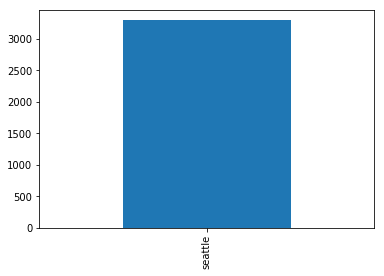

In [39]:
data['City'].value_counts().plot.bar()

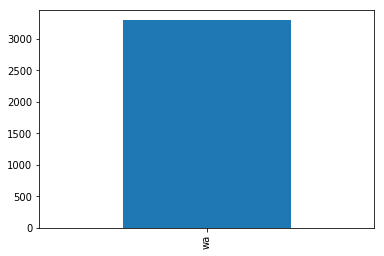

In [40]:
data['State'].value_counts().plot.bar()

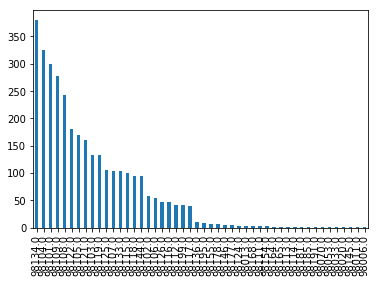

In [41]:
data['ZipCode'].value_counts().plot.bar()

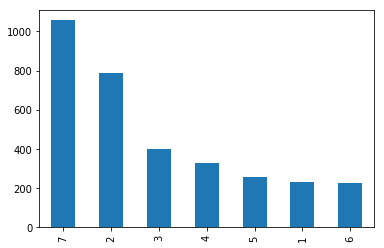

In [42]:
data['CouncilDistrictCode'].value_counts().plot.bar()

In [43]:
data = data[data['SiteEnergyUse(kBtu)'] != 0]

# Histogramme des variables numériques :

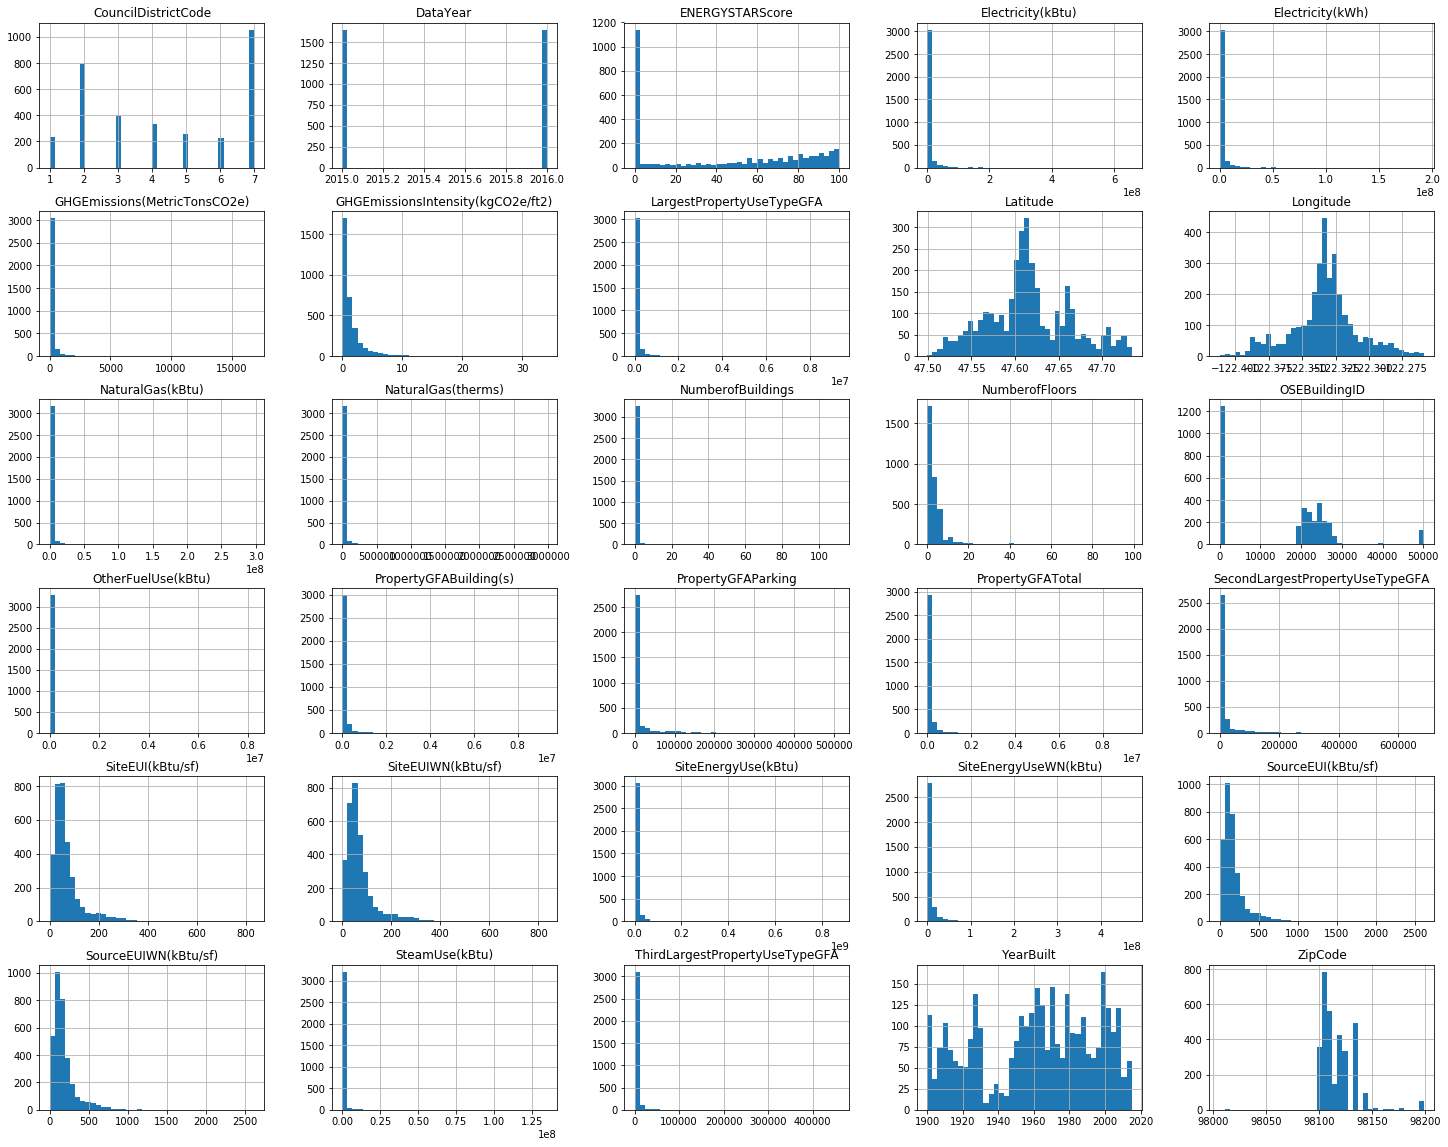

In [44]:
data.hist(figsize=(25,20), bins=40);

Présence d'outliers qui écrasent les distribution vers les faibles valeurs pour de nombreuses variables, en particuliers pour celles de surface et d'usage énergétique.

# Barchart des variables d'usages des batiments :

## Comment sont répartis les usages des bâtiments ?

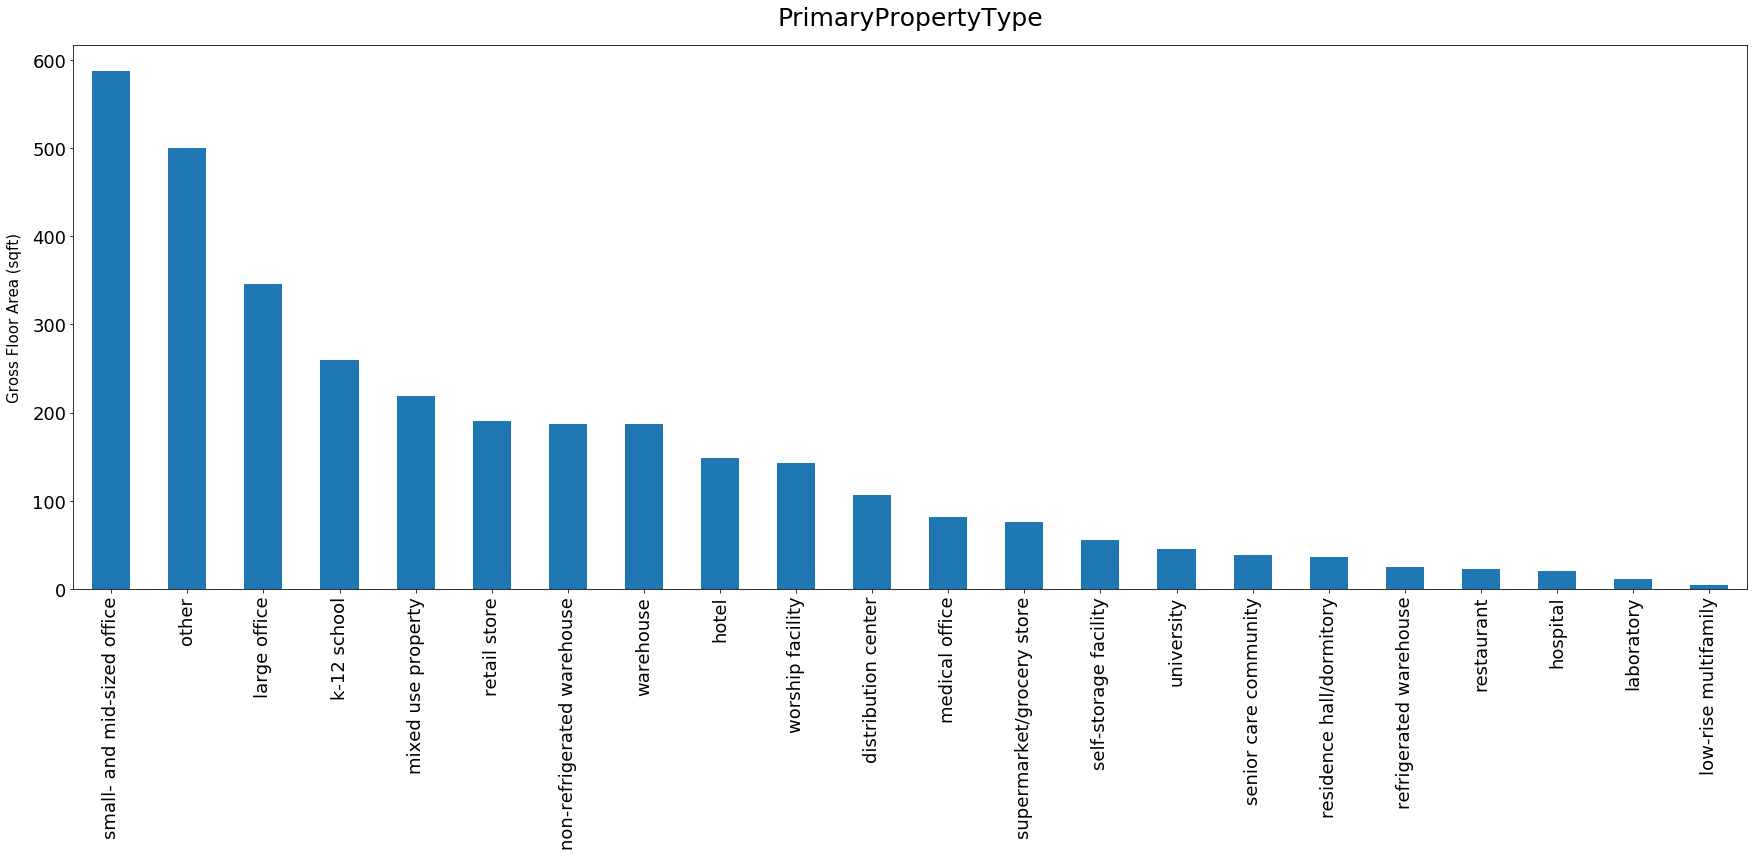

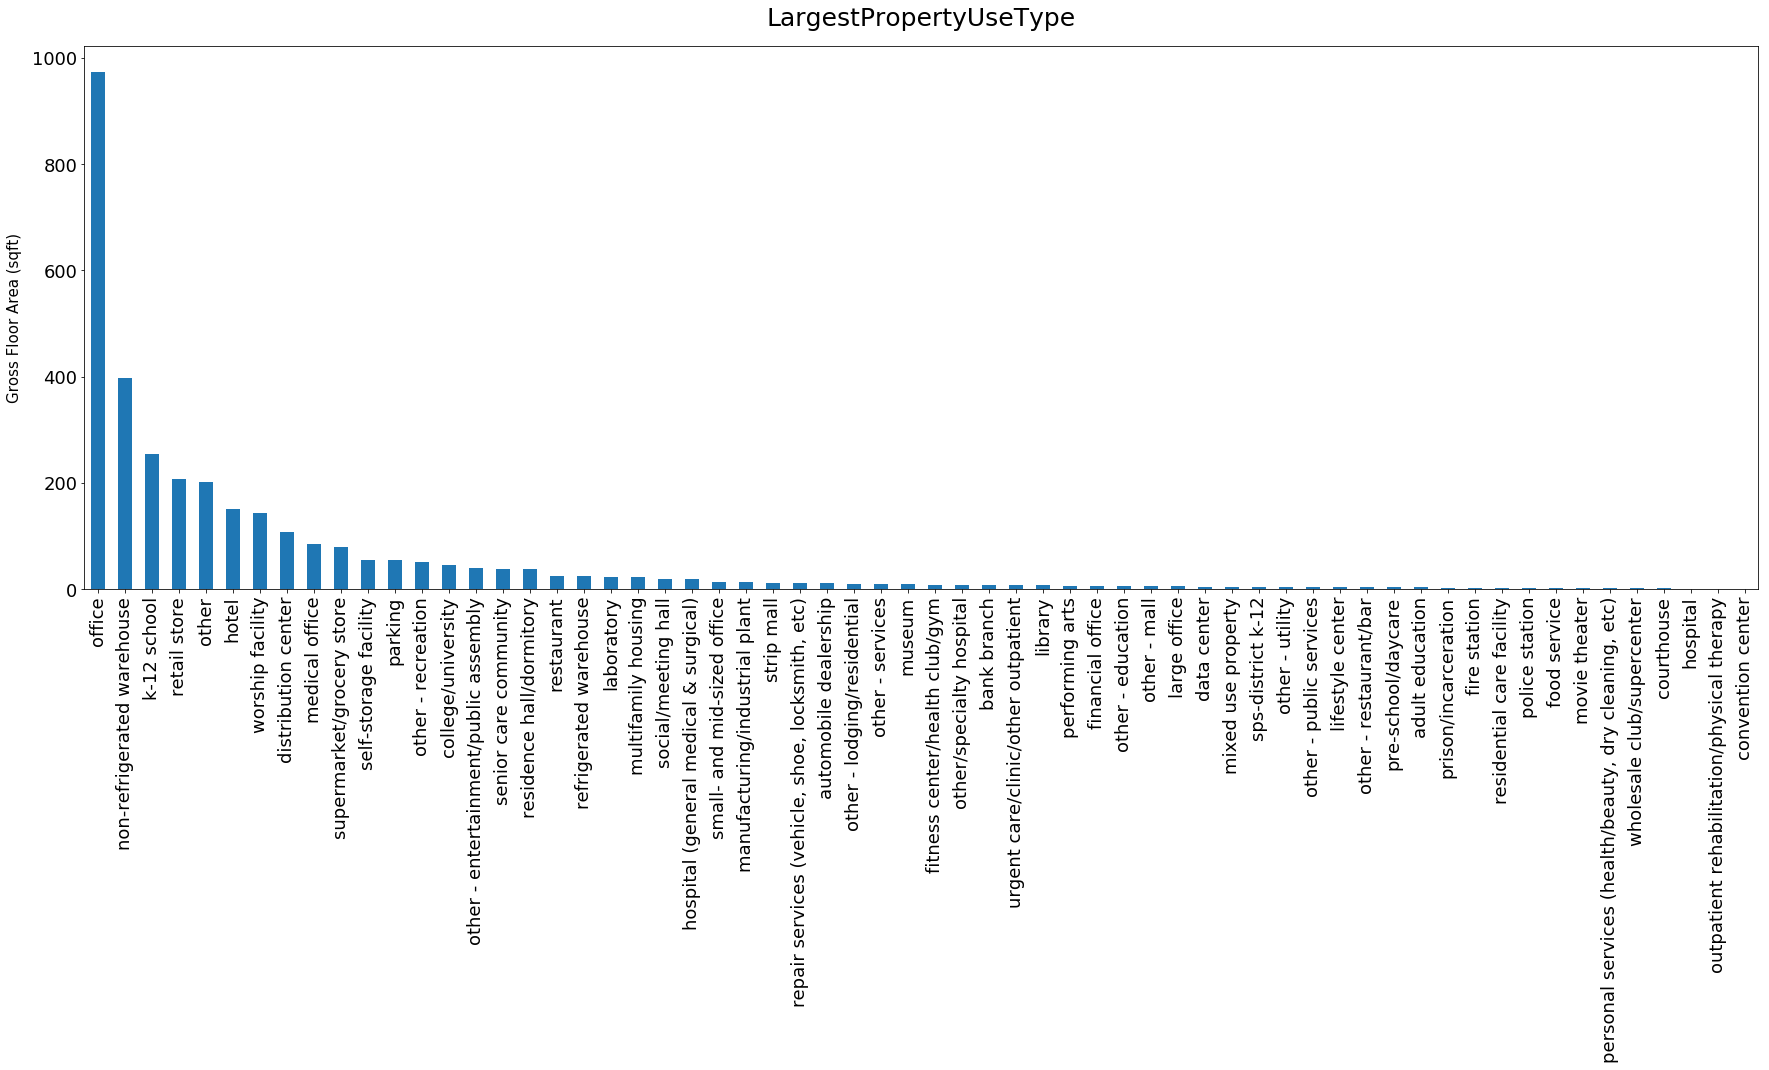

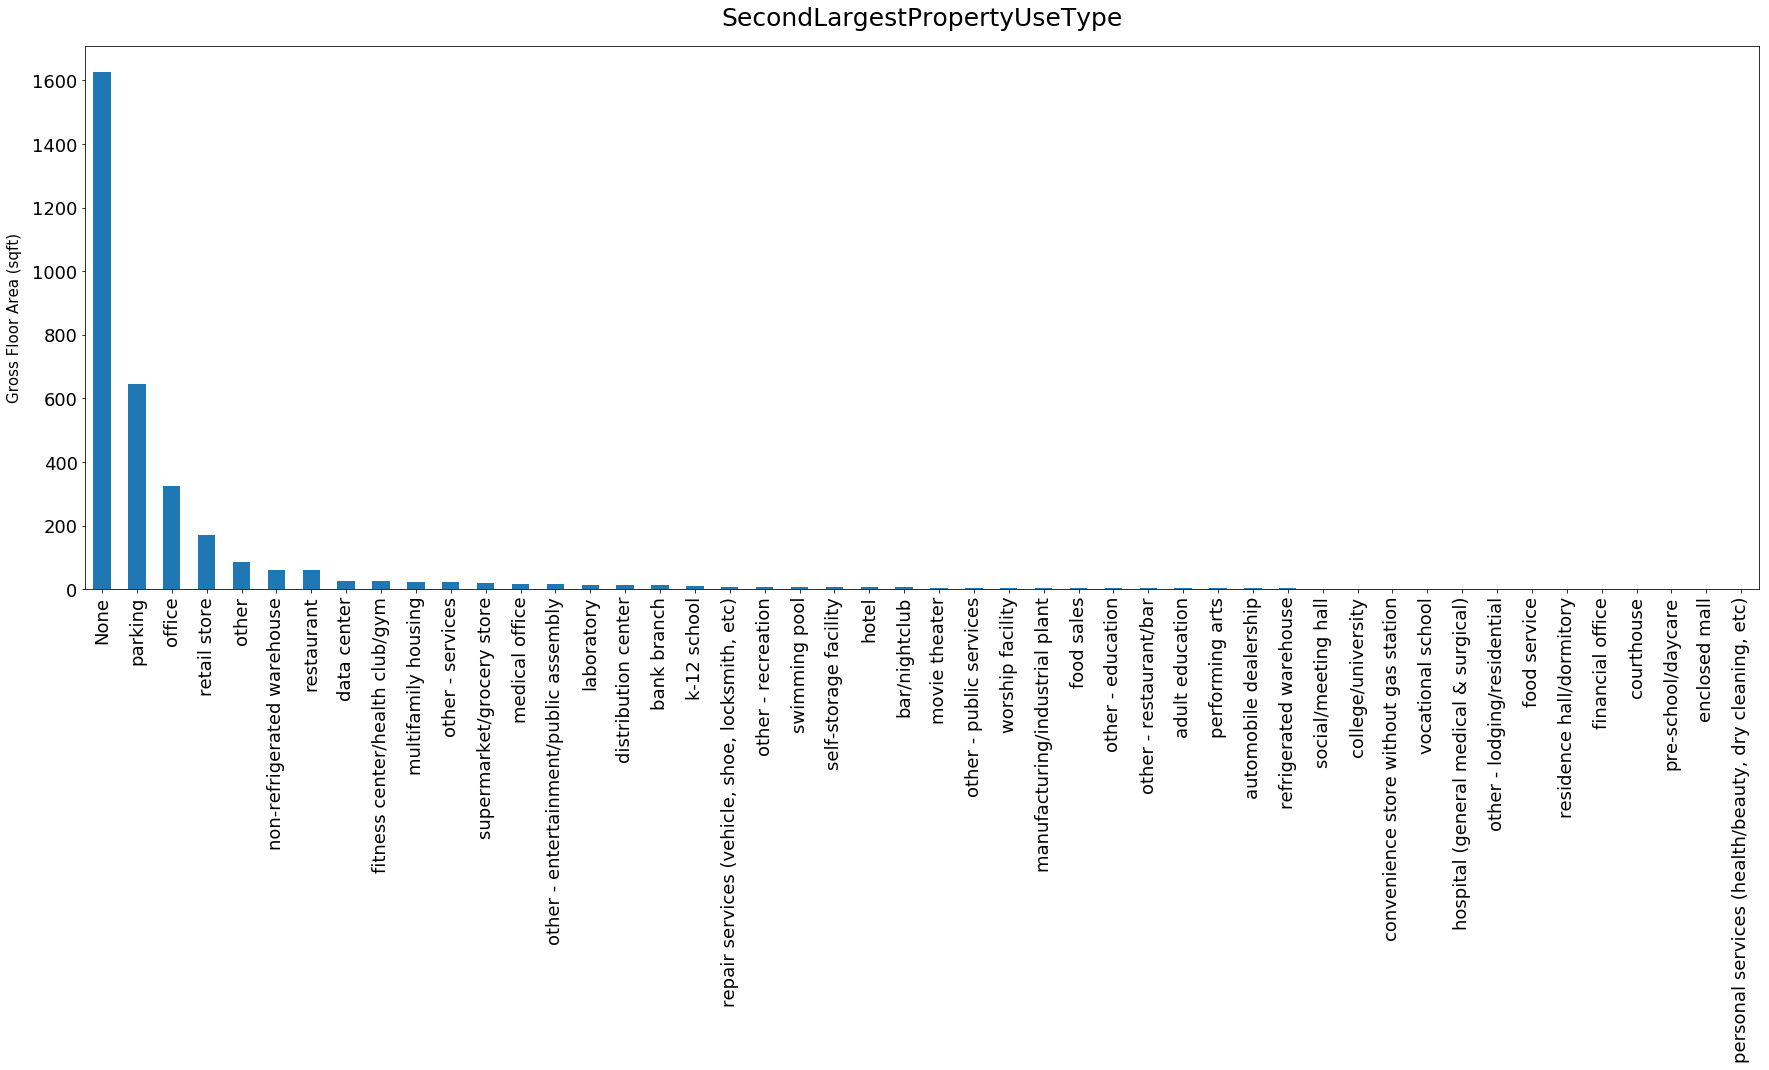

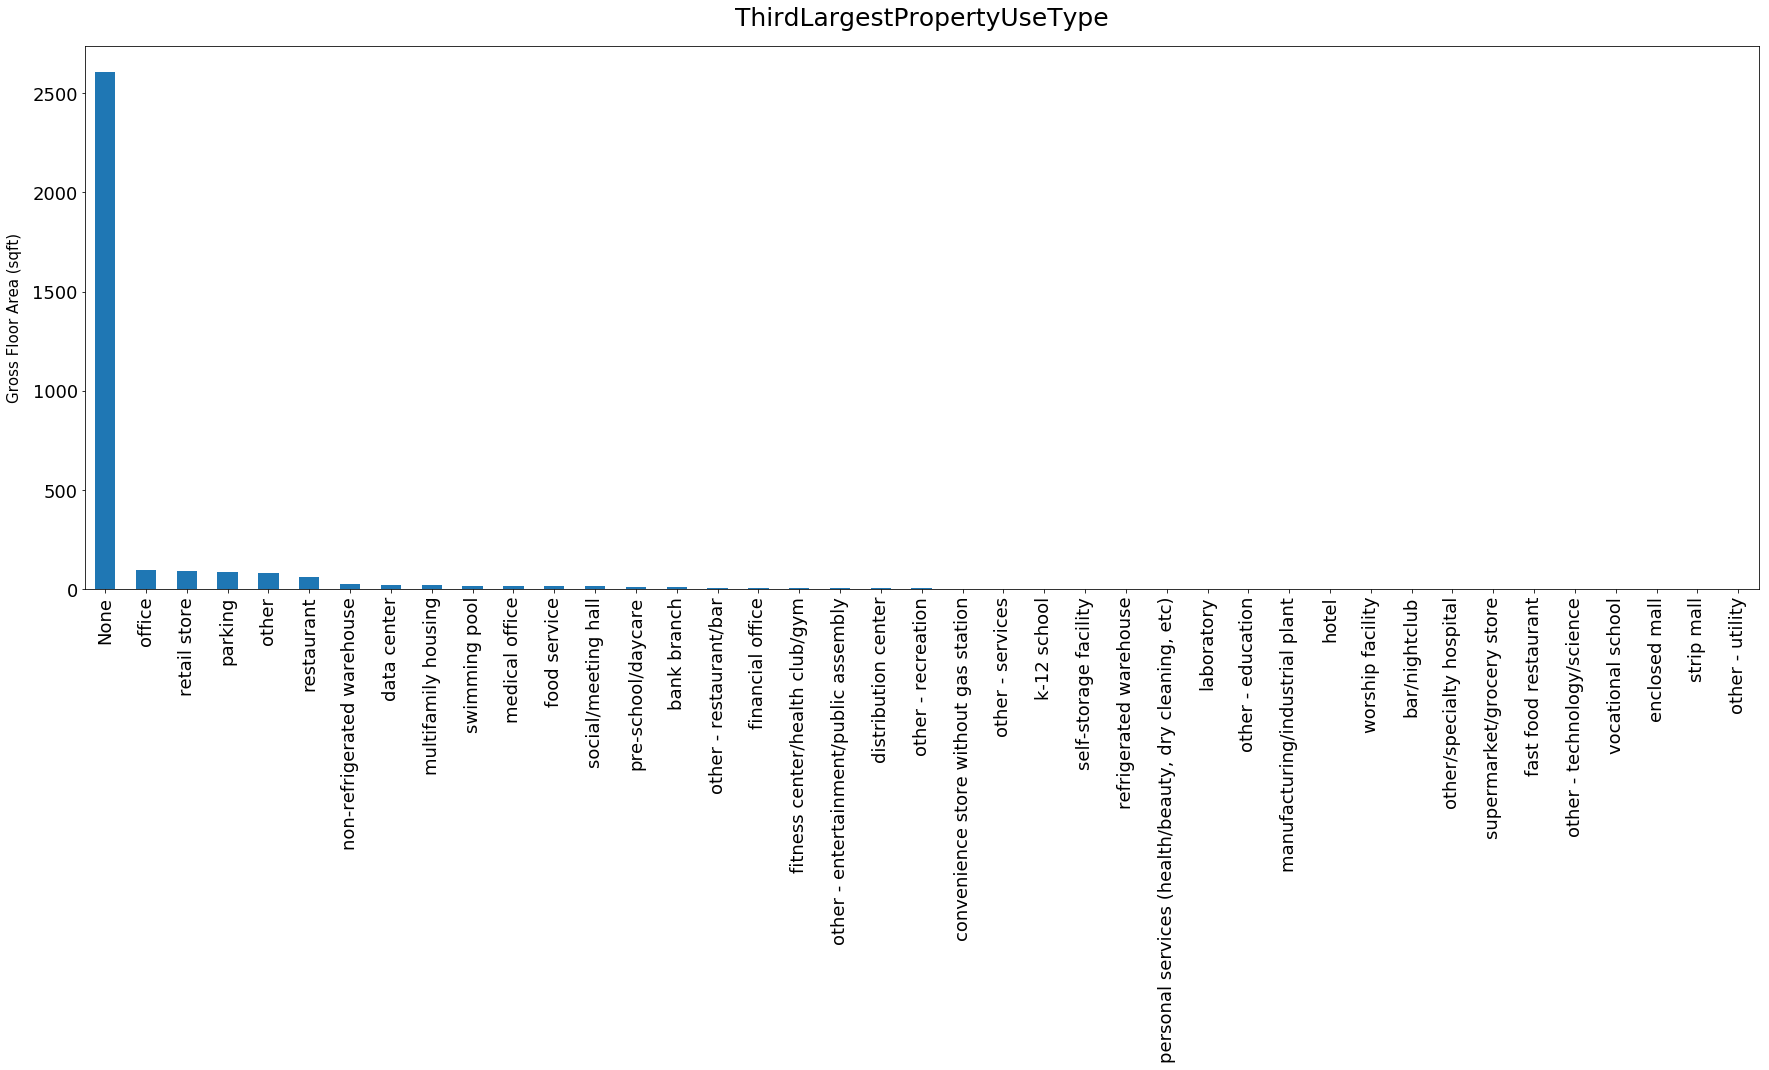

In [45]:
usage_type = ['PrimaryPropertyType','LargestPropertyUseType', 'SecondLargestPropertyUseType',
              'ThirdLargestPropertyUseType']
for var in usage_type:
    plt.figure(figsize=(30,10))
    ax = data[var].value_counts().plot.bar()
    ax.tick_params(labelsize=18)
    ax.set_ylabel('Gross Floor Area (sqft)', labelpad=10, fontsize=15)
    ax.set_title(var, fontsize=25, pad=20)

Majoritée de bureau, à noter qu'environ 500 bâtiments ne possèdent pas d'usage bien défini (catégorie 'other').

## La surface du bâtiment influence-t-elle la consommation ?

Dans cette partie on étudiera le lien entre consommation énergétique et la surface du bâtiment, selon les différents usages possibles.

In [46]:
temp = data['LargestPropertyUseType'].value_counts()
temp = list(temp.loc[temp>=5].index)
print(temp)
selection = data.loc[data['LargestPropertyUseType'].isin(temp)]
print(selection.shape)
selection['GFA_bin'] = selection.groupby('LargestPropertyUseType')['PropertyGFABuilding(s)'].transform(lambda x: pd.cut(x, 5, labels=range(1,6)).astype('int'))
selection['GFA_bin'] = selection['GFA_bin'] * 4

['office', 'non-refrigerated warehouse', 'k-12 school', 'retail store', 'other', 'hotel', 'worship facility', 'distribution center', 'medical office', 'supermarket/grocery store', 'self-storage facility', 'parking', 'other - recreation', 'college/university', 'other - entertainment/public assembly', 'senior care community', 'residence hall/dormitory', 'restaurant', 'refrigerated warehouse', 'laboratory', 'multifamily housing', 'social/meeting hall', 'hospital (general medical & surgical)', 'small- and mid-sized office', 'manufacturing/industrial plant', 'strip mall', 'repair services (vehicle, shoe, locksmith, etc)', 'automobile dealership', 'other - lodging/residential', 'other - services', 'museum', 'fitness center/health club/gym', 'other/specialty hospital', 'bank branch', 'urgent care/clinic/other outpatient', 'library', 'performing arts', 'financial office', 'other - education', 'other - mall', 'large office', 'data center', 'mixed use property']
(3241, 47)


E:\Antoine\Logiciels\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Antoine\Logiciels\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


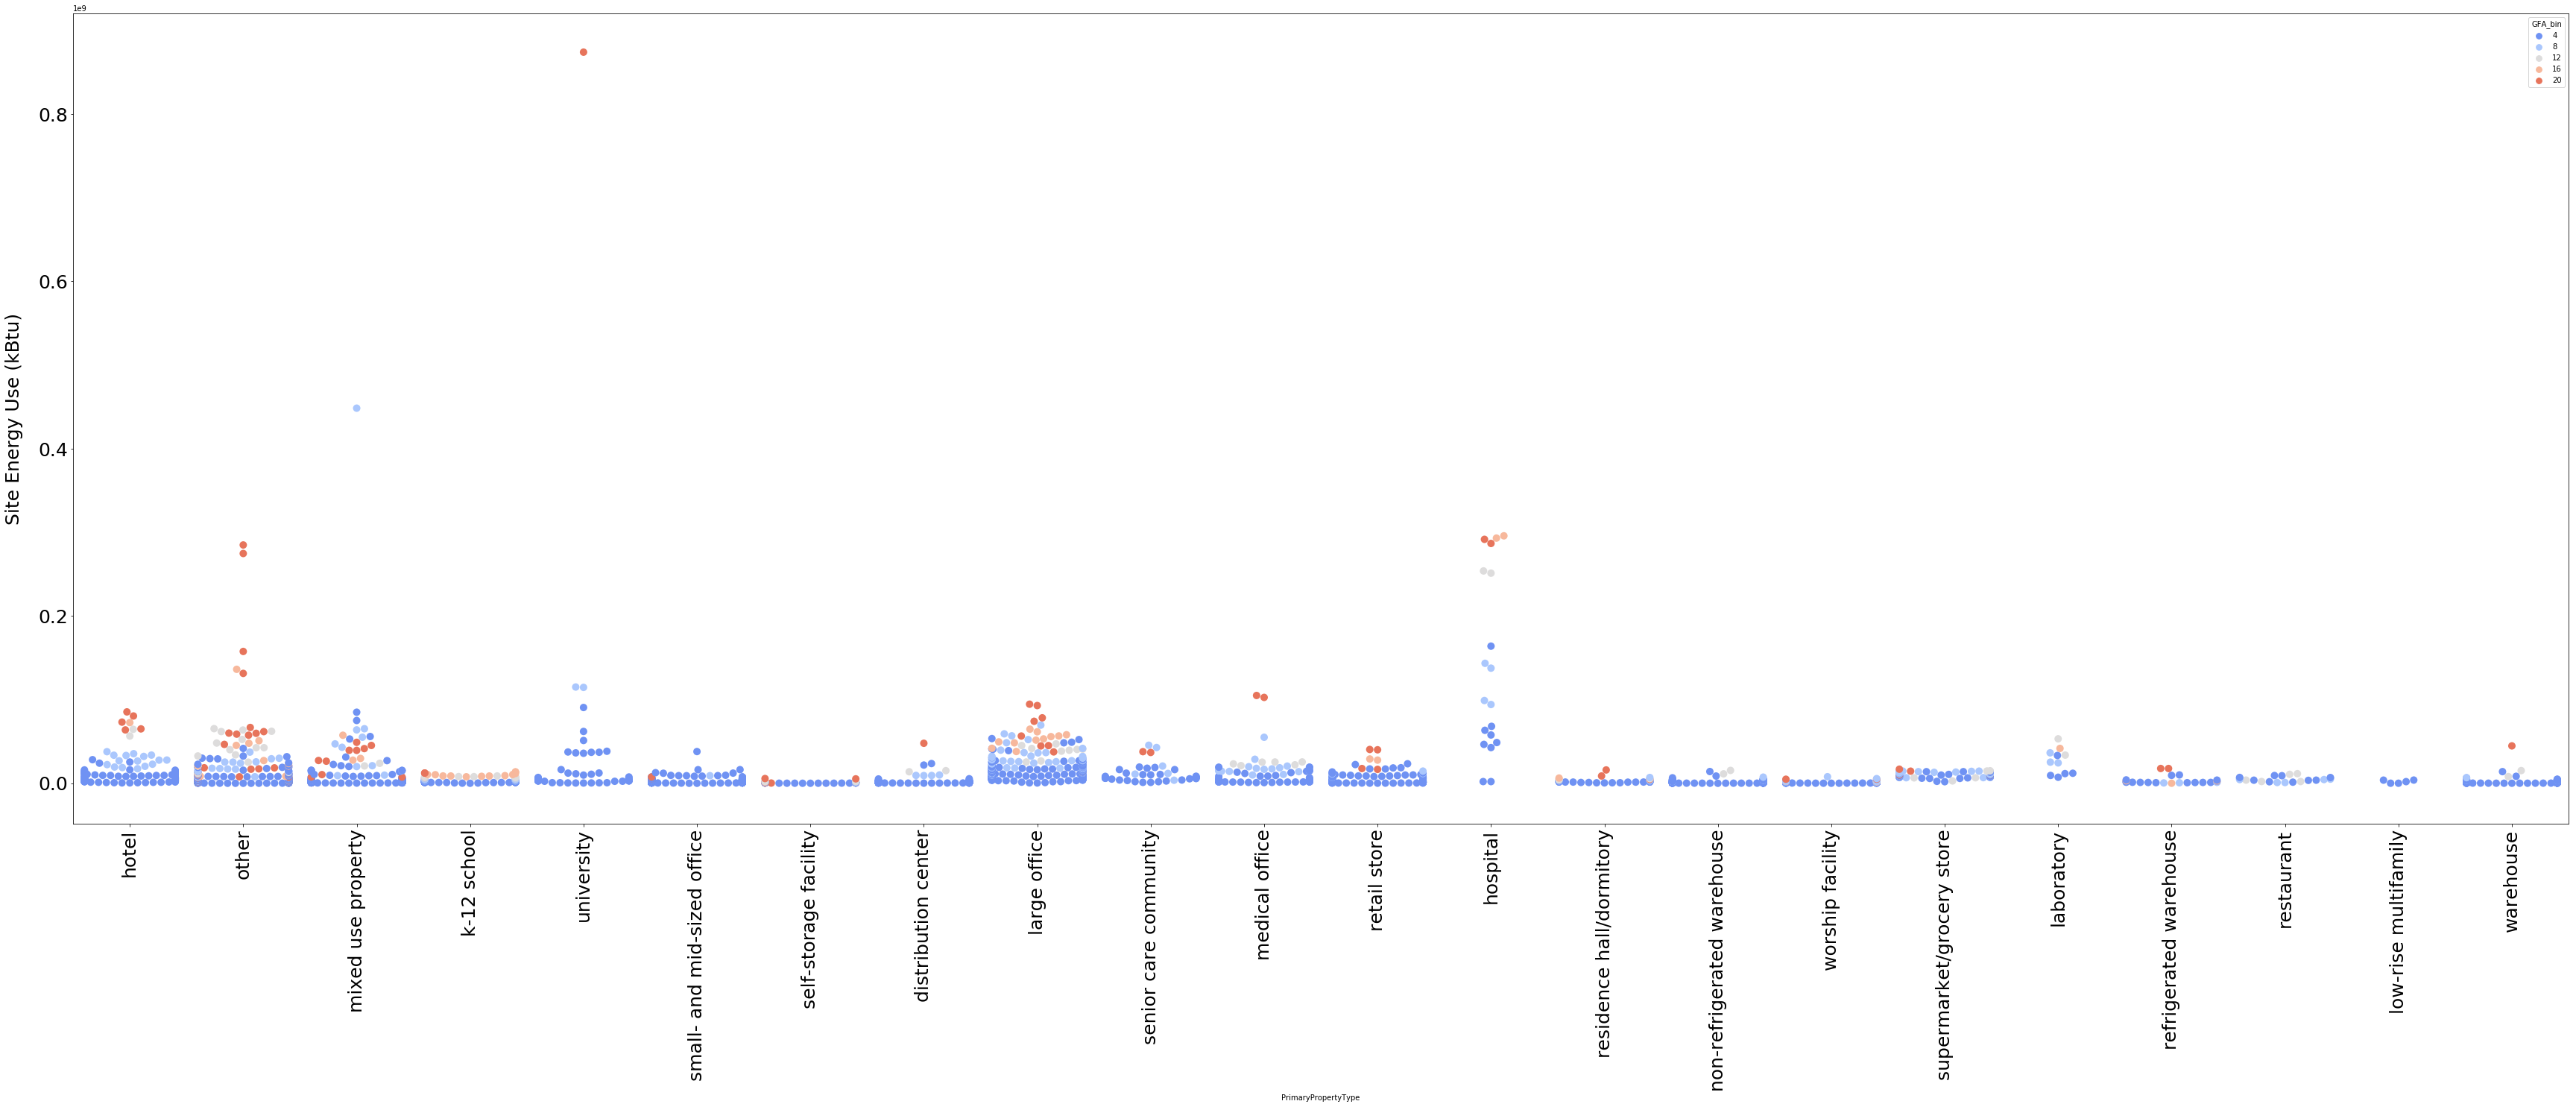

In [47]:
fig,ax = plt.subplots(figsize=(60,20))
pal = sns.color_palette("coolwarm", 5)
sns.swarmplot(x='PrimaryPropertyType', y='SiteEnergyUse(kBtu)', hue='GFA_bin', data=selection,
              palette=pal, ax=ax, size=10)
ax.tick_params(axis='x',labelrotation=90, labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_ylabel('Site Energy Use (kBtu)', labelpad=20, fontsize=25)
plt.savefig( 'vis_energy_PrimaryPropertyType_GFA.png', format='png', bbox_inches = "tight", dpi=600)

On constate que de manière générale, quel que soit l'usage du bâtiment, plus la surface sera élevée (points en rouge) plus la consommation le sera également .

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

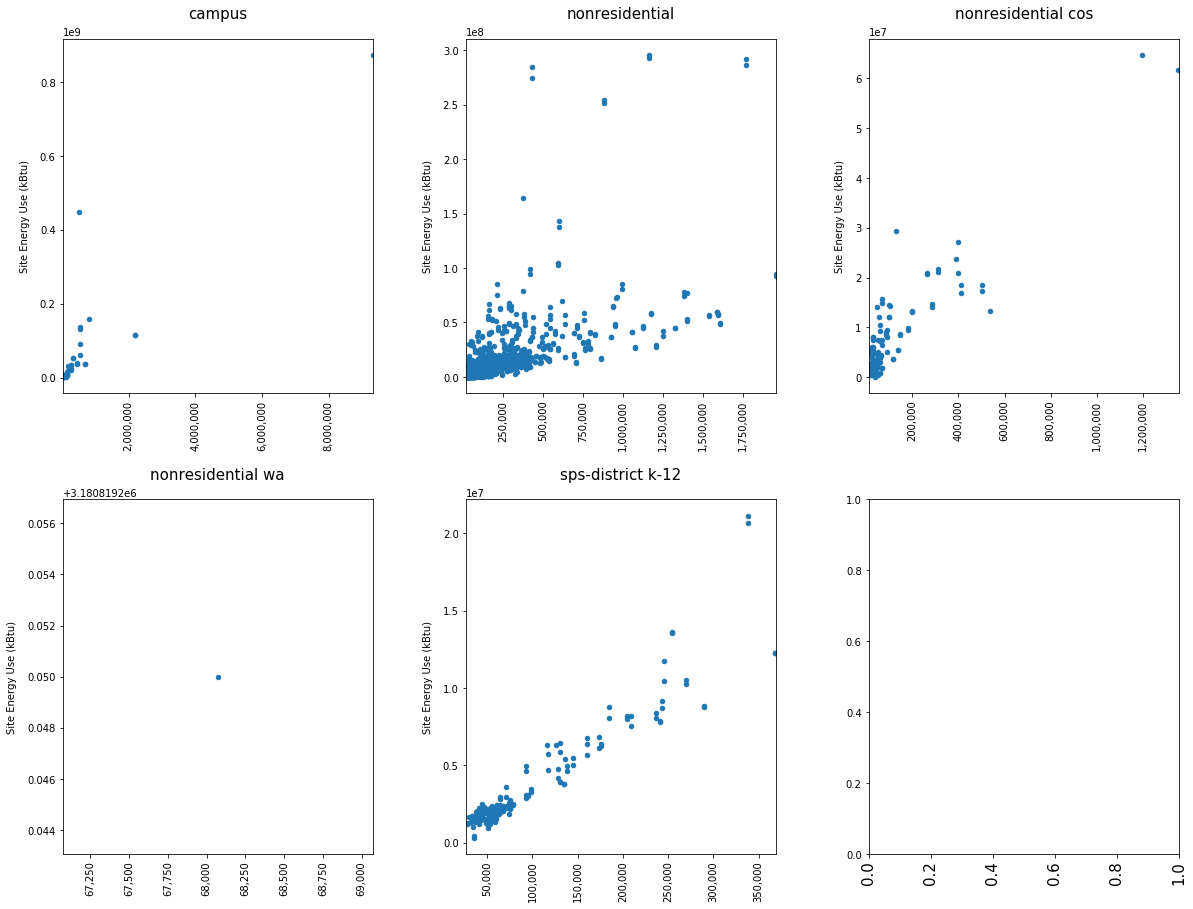

In [48]:
columns = 3
rows = data['BuildingType'].nunique() // columns + 1
scat, axs = plt.subplots(rows, columns, figsize=(20,15))
axs = axs.ravel()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
use_group = data.groupby(data['BuildingType'])
c = 0
for name, group in use_group:
    group.plot(kind='scatter', x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', ax=axs[c])
    axs[c].set_xlabel('')
    axs[c].set_ylabel('Site Energy Use (kBtu)', labelpad=10, fontsize=10)
    axs[c].set_title(name, fontsize=15, pad=20)
    axs[c].tick_params(axis='x', labelrotation=90)
    axs[c].set_xlim((group['PropertyGFATotal'].min()-1000,group['PropertyGFATotal'].max()+1000))
    axs[c].get_xaxis().set_major_formatter(mtp.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    c = c + 1
plt.xticks(rotation=90, fontsize=15)

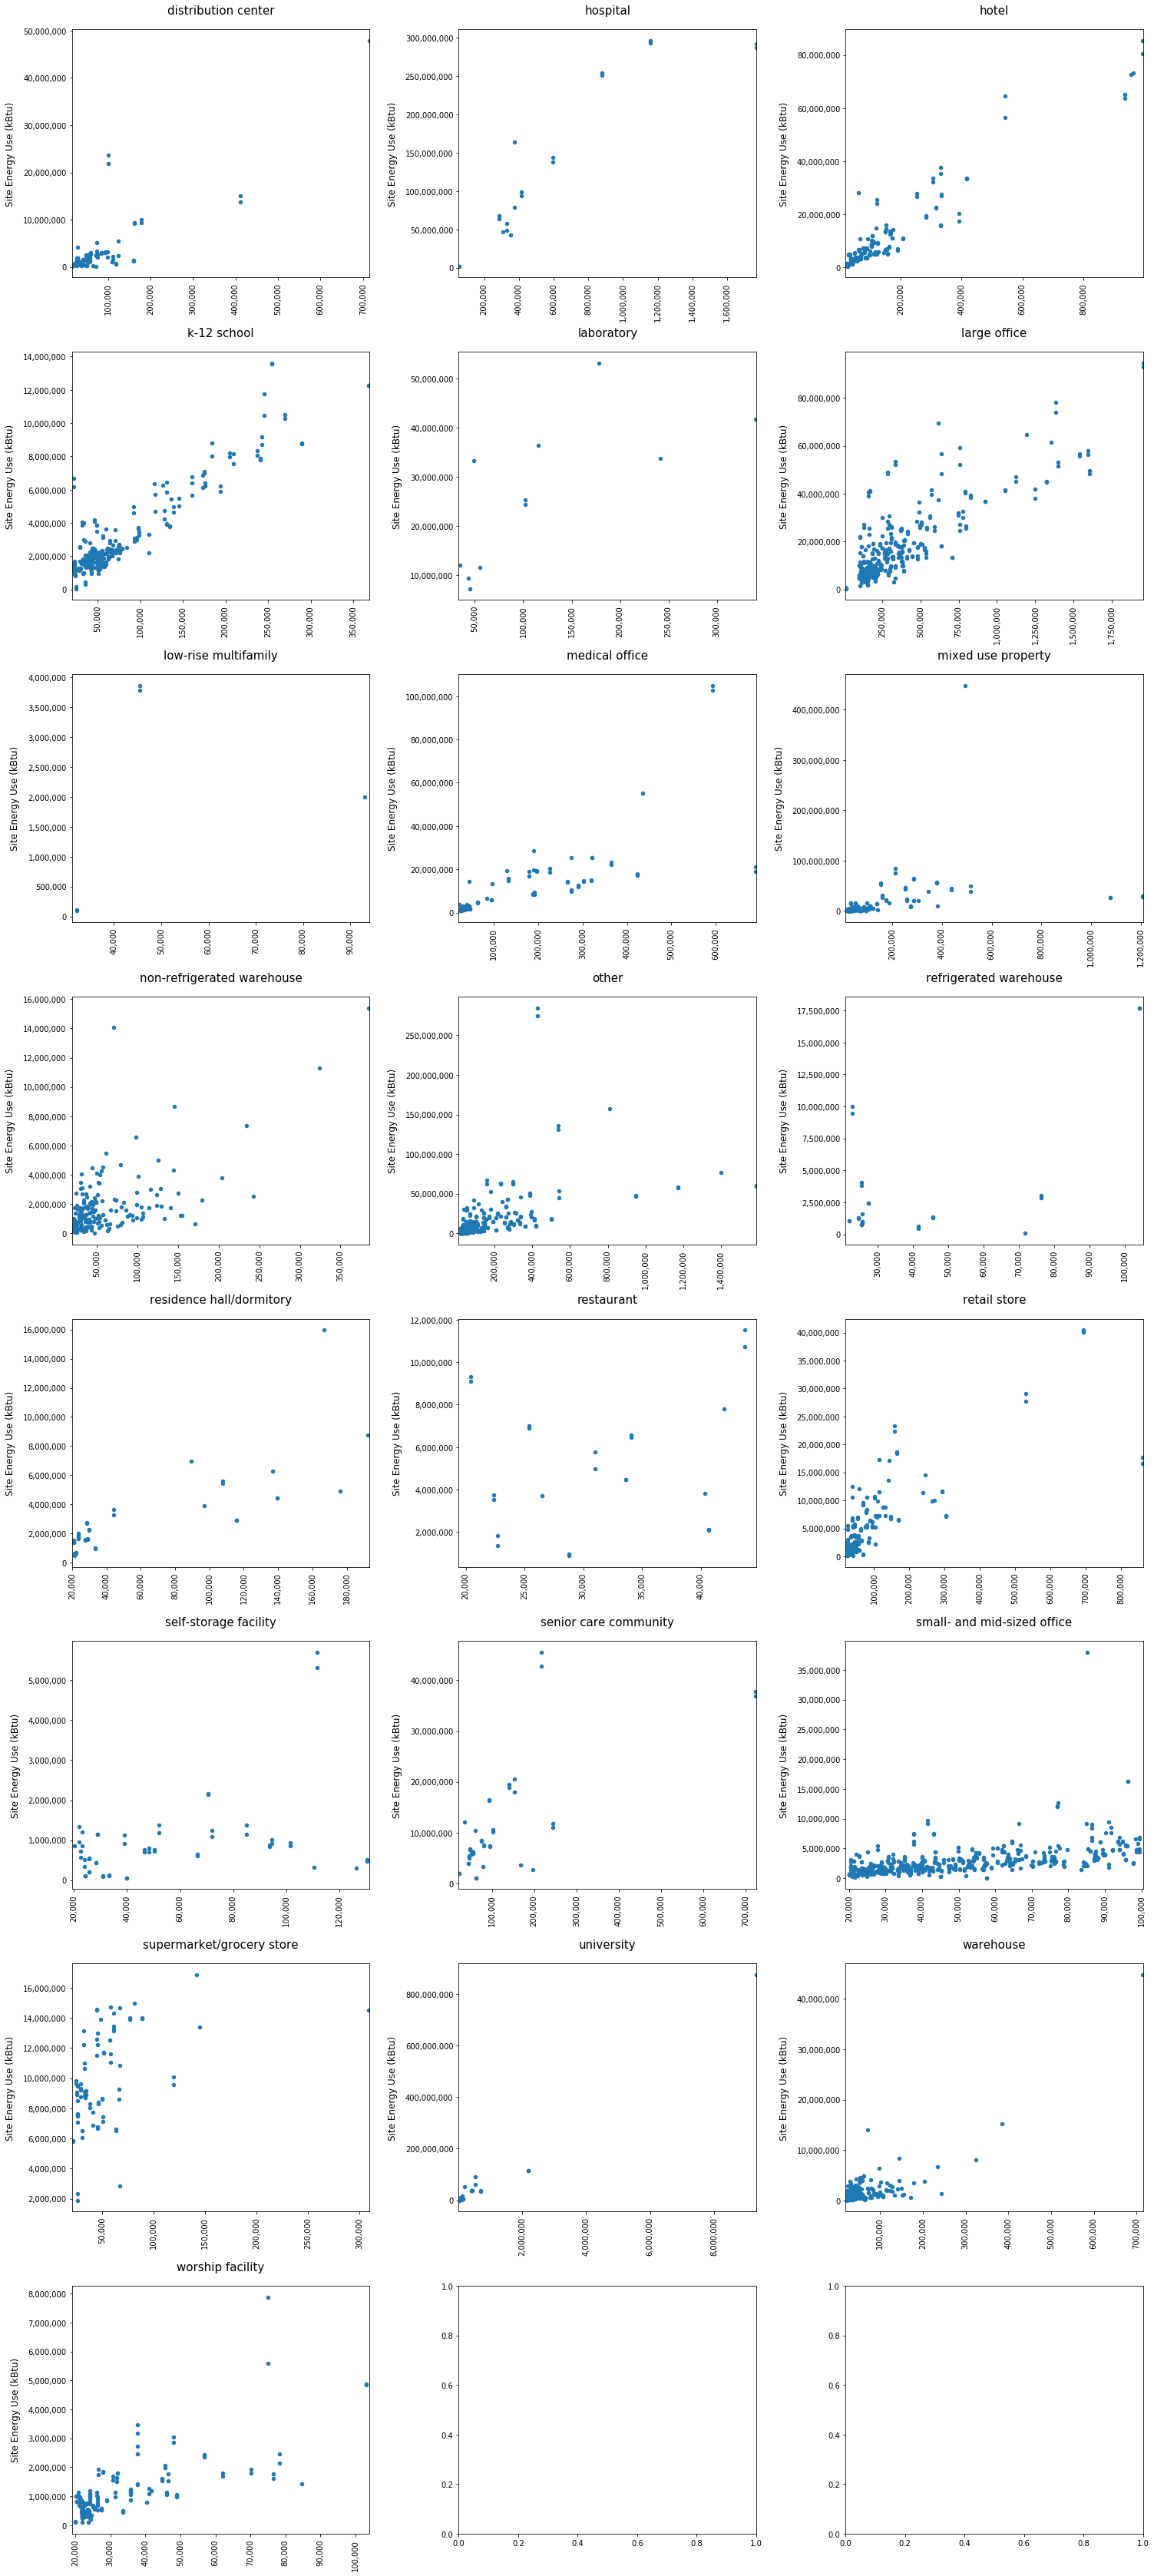

In [49]:
columns = 3
rows = data['PrimaryPropertyType'].nunique() // columns + 1
scat, axs = plt.subplots(rows, columns, figsize=(25,60))
axs = axs.ravel()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
use_group = data.groupby(data['PrimaryPropertyType'])
c = 0
for name, group in use_group:
    group.plot(kind='scatter', x='PropertyGFATotal', y='SiteEnergyUse(kBtu)',title=name, ax=axs[c])
    axs[c].set_xlabel('')
    axs[c].set_ylabel('Site Energy Use (kBtu)', labelpad=10, fontsize=12)
    axs[c].set_title(name, fontsize=15, pad=20)
    axs[c].tick_params(axis='x', labelrotation=90)
    axs[c].set_xlim((group['PropertyGFATotal'].min()-1000,group['PropertyGFATotal'].max()+1000))
    axs[c].get_xaxis().set_major_formatter(mtp.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    axs[c].get_yaxis().set_major_formatter(mtp.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    c = c + 1

Fort potentiel explicatif des variables d'usage des batiments et de leur surface.
On voit que pour chaque catégorie, de manière générale, les batiments ayant la plus grande surface consomme le plus.La relation liant consommation et surface sur leur usage principal s'approche assez souvent d'un modèle linéaire. Néanmmoins il existe des outliers importants possédants plusieurs usages donc la catégorie principale n'est pas suffisante.

# Visualisation spatiale des données de consommations / émissions :

Dans cette partie on s'attardera sur la visualisation spatiale des donnnées de consommation / émissions, afin de voir s'il existe un patern notable d'un point de vue géographique.
Le log des variables de consommation / émissions sera utilisé afin d'éviter que seule les valeurs très élevées ressortent.

## Emissions de CO2 :

E:\Antoine\Logiciels\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
E:\Antoine\Logiciels\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


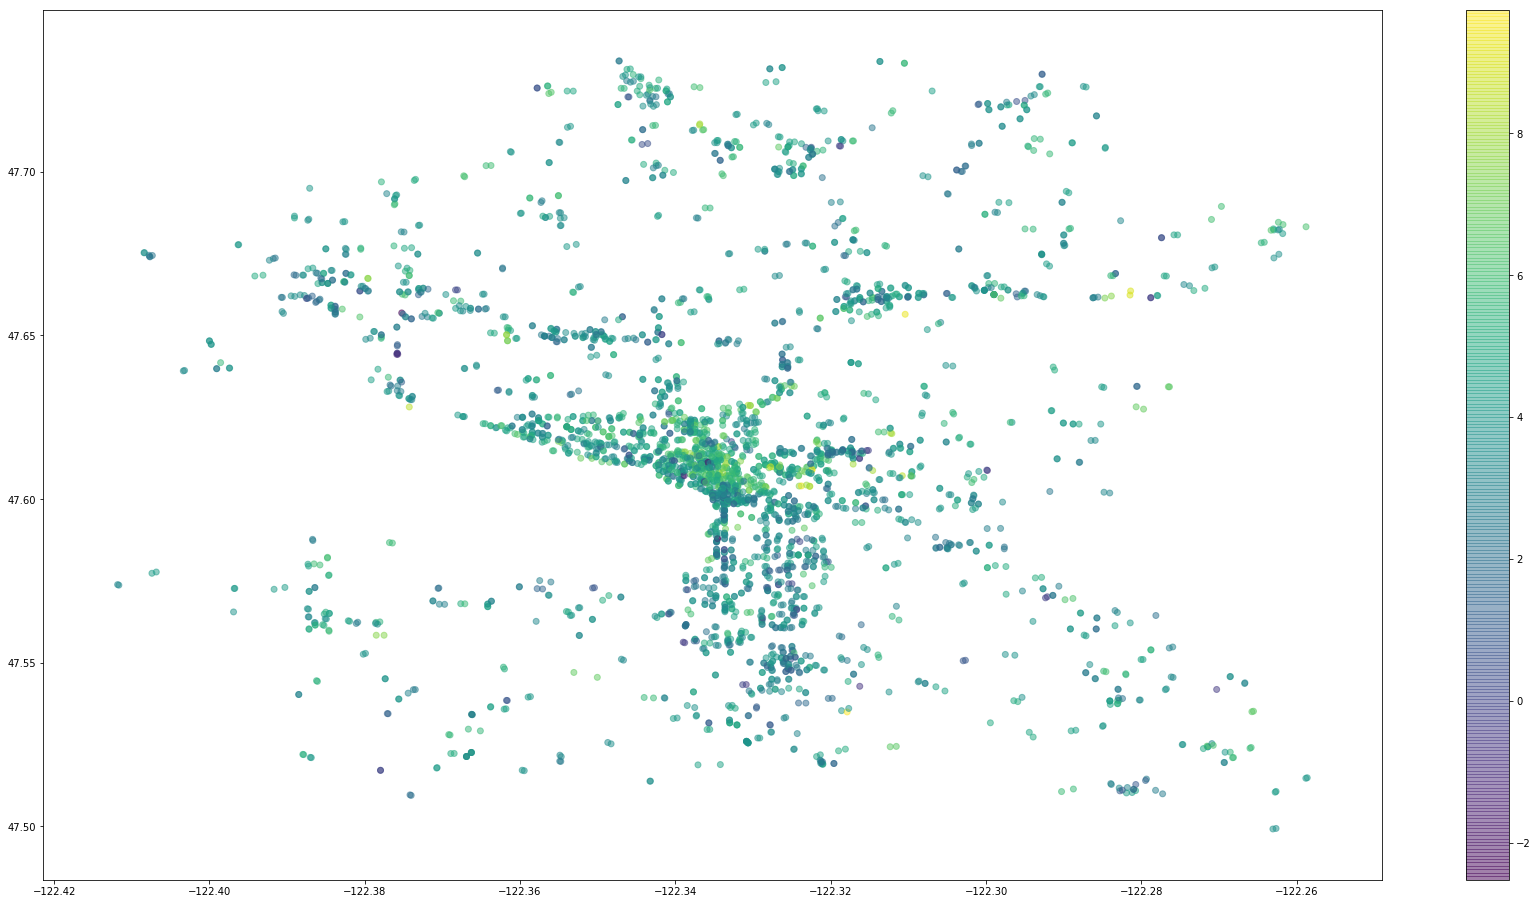

In [50]:
fig,ax = plt.subplots(figsize=(30,16))
fig = plt.scatter(data['Longitude'], data['Latitude'], c=np.log(data['GHGEmissions(MetricTonsCO2e)']),alpha=0.5)
plt.colorbar(fig)

En termes d'émissions de CO2, on ne distingue pas de pattern particulièrement notable, si ce n'est peut être une plus forte concentration de valeurs élevées dans la partie centrale de la ville.

## Utilisation de gaz naturel :

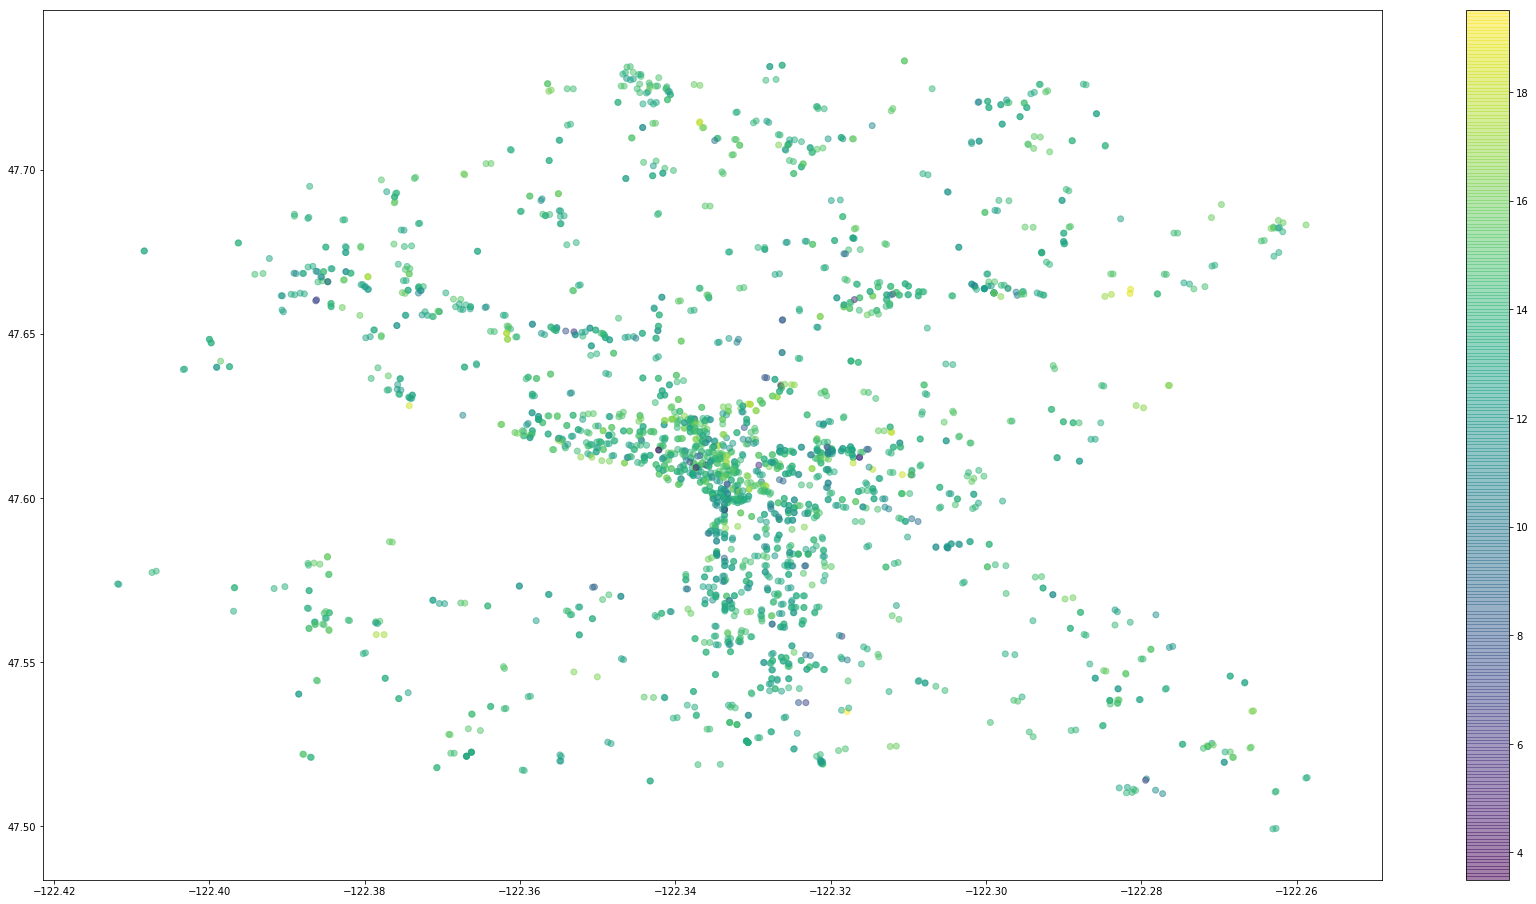

In [51]:
fig,ax = plt.subplots(figsize=(30,16))
test = data[data['NaturalGas(kBtu)'] != 0]
fig = plt.scatter(test['Longitude'], test['Latitude'], c=np.log(test['NaturalGas(kBtu)']),alpha=0.5)
plt.colorbar(fig)

Pour ce qui est de l'utilisation de gaz naturel, on ne distingue pas de pattern particulièrement notable non plus. A noter que cette source d'énergie est utilisée à travers toute la ville.

## Utilisation de vapeur (réseau de chaleur) :

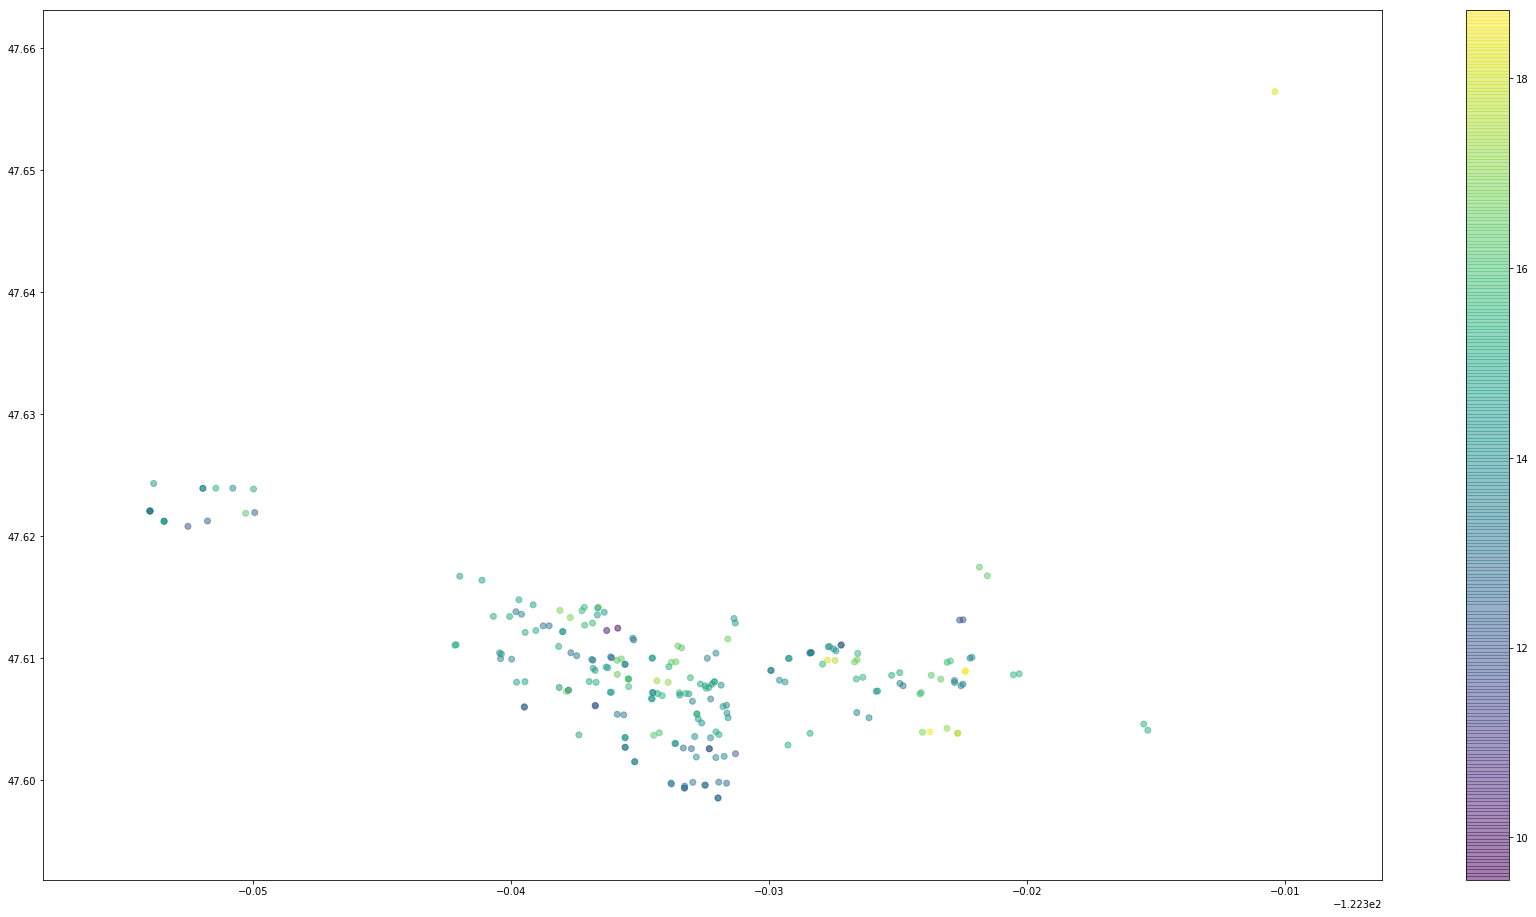

In [52]:
fig,ax = plt.subplots(figsize=(30,16))
test = data[data['SteamUse(kBtu)'] != 0]
fig = plt.scatter(test['Longitude'], test['Latitude'], c=np.log(test['SteamUse(kBtu)']),alpha=0.5)
plt.colorbar(fig)

Pour ce qui est de l'utilisation de gaz naturel, on ne distingue pas de pattern particulièrement notable non plus. A noter que cette source d'énergie est utilisée dans la partie centrale entre Sud et Nord, sans doute dû au fait que le réseau de chaleur urbain est présent uniquement dans cette zone.

## Utilisation d'électricité :

E:\Antoine\Logiciels\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


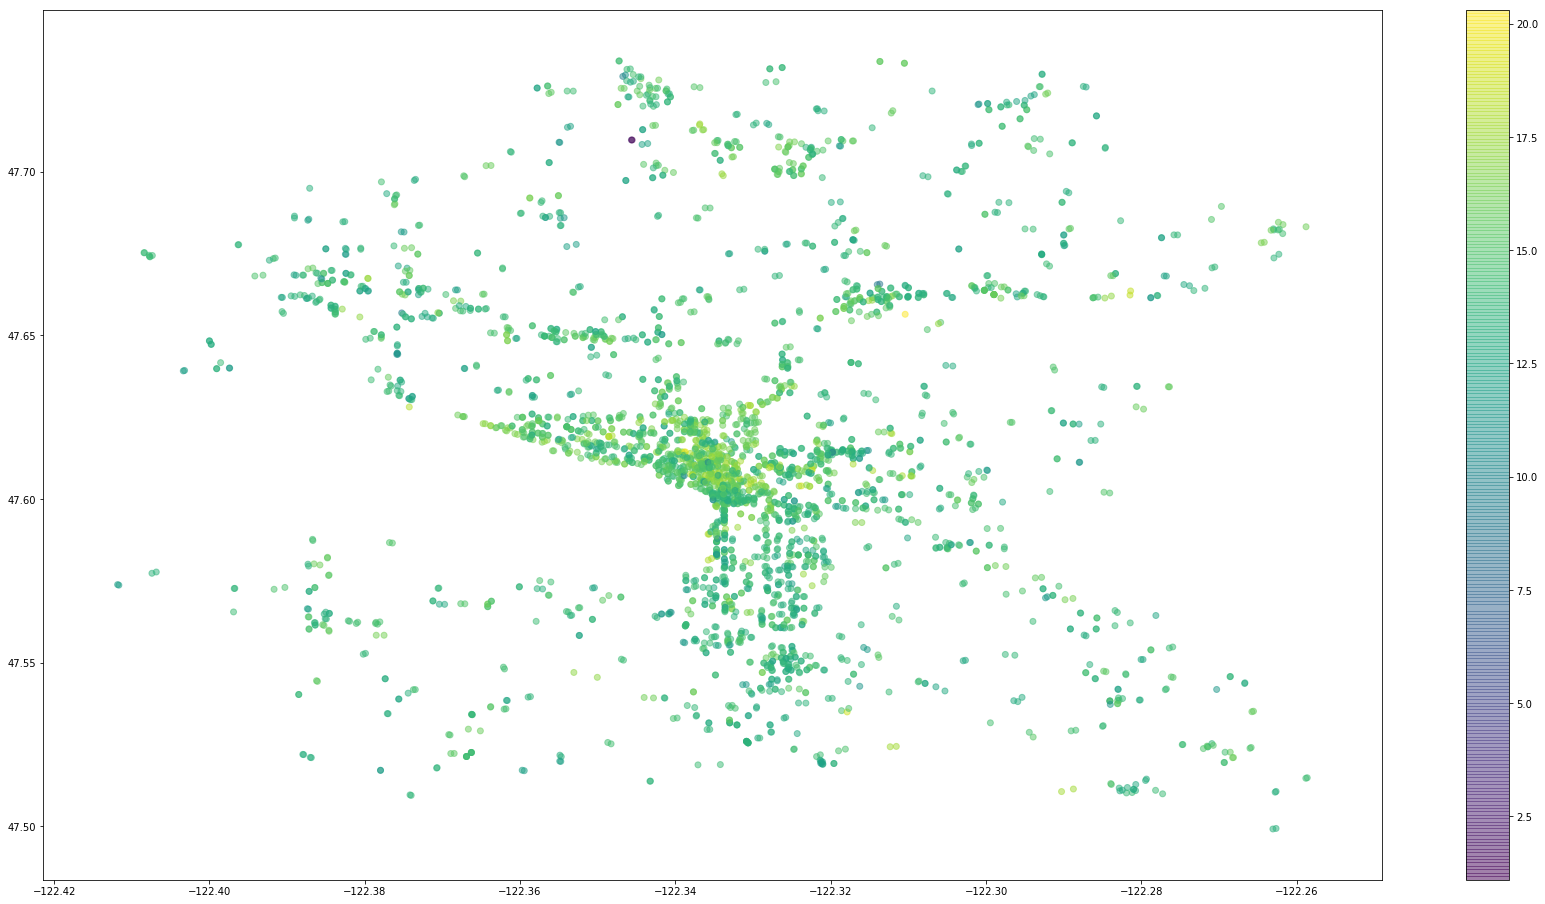

In [53]:
fig,ax = plt.subplots(figsize=(30,16))
test = data[data['Electricity(kBtu)'] != 0]
fig = plt.scatter(test['Longitude'], test['Latitude'], c=np.log(test['Electricity(kBtu)']),alpha=0.5)
plt.colorbar(fig)

En termes d'ulisation d'électricité, on ne distingue pas de pattern particulièrement notable, si ce n'est come pour les émissions de CO2 une plus forte concentration de valeurs élevées dans la partie centrale de la ville.
Au final la localisation d'un bâtiment ne semble pas avoir d'influence sur l'ampleur de sa consommation, mais seulement sur les sources d'énergies auxquelles il a accès.

# Corrélations linéaires

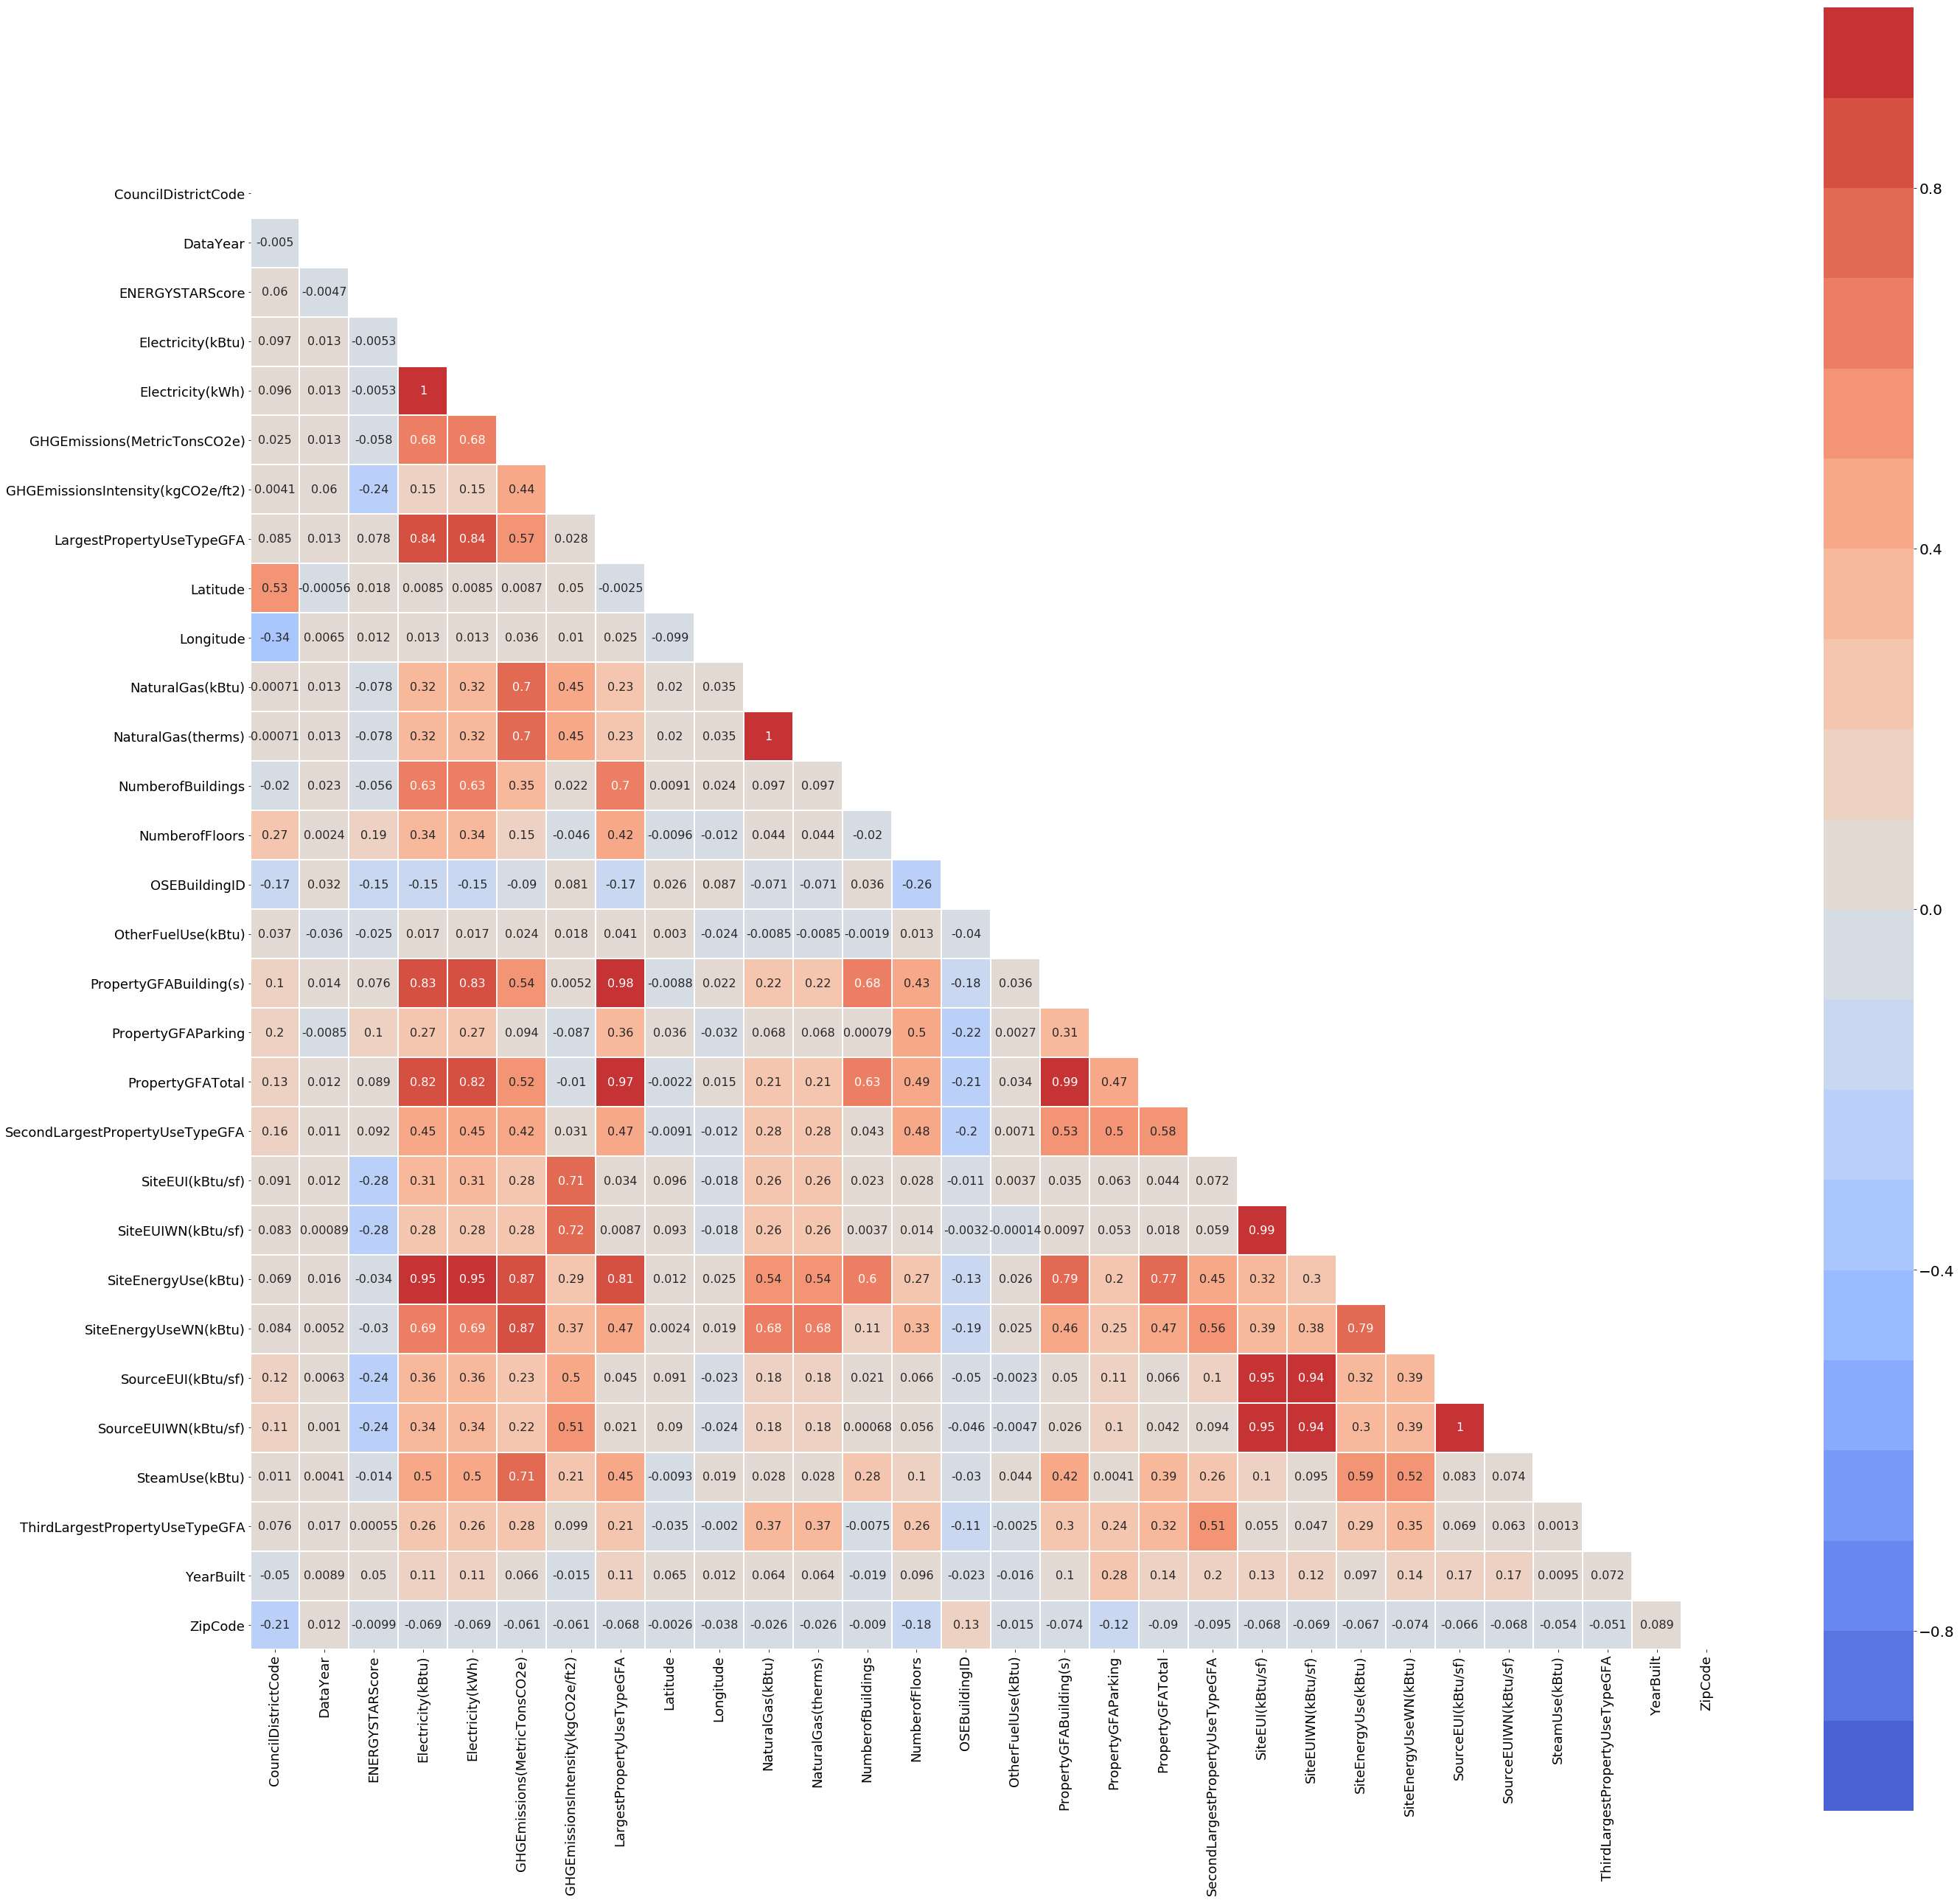

In [54]:
pearson_correlation = data.corr()
mask = np.zeros_like(pearson_correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.color_palette("coolwarm", 20)
fig1, ax1 = plt.subplots(figsize=(45,45))
ax1 = sns.heatmap(pearson_correlation, mask=mask, cmap=cmap, vmin=-1, vmax=1, 
            linewidths=1, square=True, annot=True,annot_kws={"size": 16})
ax1.tick_params(labelsize=18)
ax1.collections[0].colorbar.ax.tick_params(labelsize=20)

Pour ce qui est corrélations entre les différentes variables, il est intéressant de noter les points suivants :

- Forte corrélation entre consommation énergétique et surface de bâtiment
- Forte corrélation entre consommation et émissions


# Vérification de la cohérence des données :

Dans cette partie on essaiera de vérifier la cohérence des données. En effet de nombreuses variables sont liées entre elles (expression dans une autre unité, ratio de deux variables, décomposition d'une variable en plusieurs ...)  il est donc intéressant de s'assurer des liens entre elles pour les exploiter par la suite.

## Adéquation de la consommation totale avec les différentes sources d'énergie :

Ici l'on comparera la consommation sur les différentes sources d'énergie (électricité, gaz, vapeur ...) à la consommation globale.

In [55]:
data['energy_conservation_ratio'] = data.loc[:,['Electricity(kBtu)', 'NaturalGas(kBtu)', 
                                                'SteamUse(kBtu)', 'OtherFuelUse(kBtu)']].sum(axis=1) / data['SiteEnergyUse(kBtu)']

In [56]:
data['energy_conservation_ratio'].describe()

count    3291.000000
mean        0.998204
std         0.041126
min        -0.336762
25%         1.000000
50%         1.000001
75%         1.000029
max         1.314228
Name: energy_conservation_ratio, dtype: float64

In [57]:
display(data.loc[(data['energy_conservation_ratio'] <= 0.99) | (data['energy_conservation_ratio'] >= 1.01)])

,Address,BuildingType,City,Comments,ComplianceStatus,CouncilDistrictCode,DataYear,DefaultData,ENERGYSTARScore,Electricity(kBtu),...,SourceEUIWN(kBtu/sf),State,SteamUse(kBtu),TaxParcelIdentificationNumber,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearBuilt,YearsENERGYSTARCertified,ZipCode,energy_conservation_ratio
562,2001 western ave,nonresidential,seattle,NaN,compliant,7,2015,no,94.0,5288523.0,...,126.600000,wa,0.0,1977200280,None,0.0,1979,NaN,98121.0,1.116972
1196,12500 aurora ave n,nonresidential,seattle,NaN,compliant,5,2015,no,70.0,1482658.0,...,134.000000,wa,0.0,1926049190,None,0.0,1951,NaN,98133.0,1.314228
1303,1401 1st ave,campus,seattle,NaN,compliant,7,2015,no,0.0,4217284.0,...,268.700000,wa,0.0,1976200105,social/meeting hall,8199.0,1900,NaN,98101.0,1.284968
3394,334 1st ave. n,nonresidential cos,seattle,NaN,compliant,7,2016,false,0.0,14419146.0,...,152.100006,wa,6093150.0,1985200003,None,0.0,1962,NaN,98109.0,0.896107
3395,151 mercer st.,nonresidential cos,seattle,NaN,compliant,7,2016,false,0.0,3754115.0,...,265.399994,wa,4120130.0,1985200003,None,0.0,1962,NaN,98109.0,0.967215
3396,305 harrison st.,nonresidential cos,seattle,NaN,compliant,7,2016,false,0.0,7252325.0,...,140.000000,wa,9763690.0,1985200305,None,0.0,1938,NaN,98109.0,0.812025
3398,225 mercer st.,nonresidential cos,seattle,NaN,compliant,7,2016,false,0.0,1293349.0,...,109.500000,wa,1202380.0,1988200440,None,0.0,1962,NaN,98109.0,0.915404
3400,321 mercer st.,nonresidential cos,seattle,NaN,compliant,7,2016,false,0.0,13512686.0,...,175.199997,wa,5137220.0,1988200700,None,0.0,1928,NaN,98109.0,0.899951
3525,1600 7th ave,nonresidential,seattle,NaN,compliant,7,2016,false,89.0,40839637.0,...,195.899994,wa,0.0,0659000165,other,33110.0,1976,20172015,98191.0,1.012978
3721,221 yale avenue north,nonresidential,seattle,NaN,compliant,7,2016,false,95.0,7877393.0,...,113.500000,wa,0.0,6849700145,retail store,0.0,2005,NaN,98109.0,0.869573


On constate que dans la grande majorité des cas la consommation globale correspond bien à la somme des différentes sources d'énergie (seuls 27 bâtiments ont plus de 1% de différence entre ces deux valeurs).

## Ratio consommation / surface :

Ici on regardera si la consommation énergétique relative à la surface correspond bien au valeurs de consommation et de surface globales. Pour cela on calculera la première à partir des deux autres et on la comparera avec la variable existante 'SiteEUI(kBtu/sf)'.

In [58]:
data['energy_surface_equiv'] = data['SiteEnergyUse(kBtu)'] / data['LargestPropertyUseTypeGFA']
data['energy_surface_ratio'] = data['energy_surface_equiv'] / data['SiteEUI(kBtu/sf)']

In [59]:
data['energy_surface_ratio'].describe()

count    3291.000000
mean        1.165860
std         0.375266
min         0.252873
25%         0.999811
50%         1.000546
75%         1.157668
max         5.450664
Name: energy_surface_ratio, dtype: float64

In [60]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
display(data.loc[(data['energy_surface_ratio'] <= 0.95) | (data['energy_surface_ratio'] >= 1.05)])

,Address,BuildingType,City,Comments,ComplianceStatus,CouncilDistrictCode,DataYear,DefaultData,ENERGYSTARScore,Electricity(kBtu),...,SteamUse(kBtu),TaxParcelIdentificationNumber,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearBuilt,YearsENERGYSTARCertified,ZipCode,energy_conservation_ratio,energy_surface_equiv,energy_surface_ratio
1,724 pine st,nonresidential,seattle,NaN,compliant,7,2015,no,51.0,3.905411e+06,...,0.0,659000220,restaurant,4622.0,1996,NaN,98101.0,1.000019,99.597461,1.055058
10,1101 4th ave,nonresidential,seattle,NaN,compliant,7,2015,no,48.0,6.337531e+06,...,3623542.0,942000145,None,0.0,1969,NaN,98101.0,1.000018,109.944825,1.087486
16,909 4th ave,nonresidential,seattle,NaN,compliant,7,2015,no,0.0,5.288219e+06,...,4398022.0,942000350,swimming pool,0.0,1930,NaN,98104.0,1.000021,114.892022,1.445183
18,810 4th ave,nonresidential,seattle,NaN,compliant,7,2015,no,0.0,3.773975e+06,...,1755365.0,942000510,office,9741.0,1907,NaN,98104.0,1.000021,455.040019,3.494931
32,4649 sunnyside ave n,nonresidential,seattle,NaN,compliant,4,2015,no,0.0,1.353524e+06,...,0.0,825049008,other - entertainment/public assembly,4307.0,1906,NaN,98103.0,1.000014,97.421513,1.645634
38,5305 shilshole ave nw,nonresidential,seattle,NaN,compliant,6,2015,no,57.0,4.289697e+06,...,0.0,467000429,None,0.0,1961,NaN,98107.0,1.000029,108.729770,1.706904
39,2524 16th ave s,nonresidential,seattle,NaN,compliant,2,2015,no,93.0,1.226016e+06,...,0.0,570000340,None,0.0,1900,NaN,98144.0,1.000024,41.891591,1.154038
41,11 vine st,nonresidential,seattle,NaN,compliant,7,2015,no,0.0,1.607511e+06,...,0.0,653000225,office,3859.0,1911,NaN,98121.0,1.000031,55.856344,1.831356
43,1513 5th ave,nonresidential,seattle,NaN,compliant,7,2015,no,79.0,9.214222e+06,...,0.0,1975700200,data center,354.0,1973,2016,98101.0,1.000041,89.021758,1.639443
44,1518 3rd ave,nonresidential,seattle,NaN,compliant,7,2015,no,0.0,3.916108e+06,...,0.0,1975700380,None,0.0,1910,NaN,98101.0,1.000041,112.053882,1.143407


In [61]:
data['surface_equiv'] = data['SiteEnergyUse(kBtu)'] /data['SiteEUI(kBtu/sf)']
data.loc[:,['surface_equiv', 'PropertyGFABuilding(s)', 'PropertyGFATotal', 'LargestPropertyUseTypeGFA', 
            'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']]

,surface_equiv,PropertyGFABuilding(s),PropertyGFATotal,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
0,88484.512041,88434,88434,88434.0,0.0,0.000000
1,88498.252119,88502,103566,83880.0,15064.0,4622.000000
2,757046.128364,961990,961990,757243.0,100000.0,0.000000
3,61314.769765,61320,61320,61320.0,0.0,0.000000
4,123472.930891,107430,119890,123445.0,68009.0,0.000000
5,88813.441415,60090,97288,88830.0,0.0,0.000000
6,81311.339402,83008,83008,81352.0,0.0,0.000000
7,102816.352000,102761,102761,102761.0,0.0,0.000000
8,164074.597403,163984,163984,163984.0,0.0,0.000000
10,145596.963403,133884,153163,133884.0,0.0,0.000000


Dans de nombreux cas ces valeurs ne sont pas cohérentes(1085 cas ne le sont pas à 5% près). On préférera calculer de nouveau la consommation énergétique relative à la surface si l'on venait à en avoir besoin.

## Lien entre émissions CO2 et énergies consommées

Pour cette partie, on vérifiera le lien entre la consommation sur les différentes sources d'énergie et les émissions de CO2. Ces variables sont normalement liées par un coefficient différent pour chaque source.
Pour cela on calculera les émissions pour un batiment issus de chaque source d'énergie et on comparera la somme de celles-ci à la variable 'GHGEmissions(MetricTonsCO2e)'. Les coefficients utilisés sont ceux mentionnés dans le descriptif des données sur Kaggle, modifiés pour être exprimés dans la bonne unité.

In [62]:
data['elec_co2_em'] = 0.0000069710953 * data['Electricity(kBtu)']
data['gas_co2_em'] = 0.00005311 * data['NaturalGas(kBtu)']
data['steam_co2_em'] = 0.0000771877506 * data['SteamUse(kBtu)']
data['equiv_em'] = data['elec_co2_em'] + data['gas_co2_em'] + data['steam_co2_em']
data['emissions_ratio'] = data['GHGEmissions(MetricTonsCO2e)'] / data['equiv_em']

In [63]:
display(data.loc[(data['emissions_ratio'] <= 0.99) | (data['emissions_ratio'] >= 1.01)])

,Address,BuildingType,City,Comments,ComplianceStatus,CouncilDistrictCode,DataYear,DefaultData,ENERGYSTARScore,Electricity(kBtu),...,ZipCode,energy_conservation_ratio,energy_surface_equiv,energy_surface_ratio,surface_equiv,elec_co2_em,gas_co2_em,steam_co2_em,equiv_em,emissions_ratio
1234,1520 5th ave,nonresidential,seattle,NaN,compliant,7,2015,no,100.0,43945.0,...,98101.0,1.000046,1.757720,0.976511,24412.777778,0.306345,0.0,0.0,0.306345,1.011932
1301,1315 1st ave,nonresidential,seattle,NaN,compliant,7,2015,no,0.0,24127.0,...,98101.0,1.000041,1.004455,1.004455,24126.000000,0.168192,0.0,0.0,0.168192,1.010752
2142,720 25th ave,nonresidential,seattle,NaN,compliant,3,2015,no,100.0,50897.0,...,98122.0,1.000000,2.339061,1.016983,24562.173913,0.354808,0.0,0.0,0.354808,0.986449
4541,1520 fifth ave,nonresidential,seattle,NaN,non-compliant,7,2016,false,0.0,24105.0,...,98101.0,0.999979,0.964220,0.964220,24105.500000,0.168038,0.0,0.0,0.168038,1.011674
5496,1701 first ave south,nonresidential,seattle,NaN,non-compliant,2,2016,false,0.0,16809.0,...,98134.0,1.000006,0.680054,0.971506,24012.715255,0.117177,0.0,0.0,0.117177,1.024091


On constate que les données sont cohérentes, les rares points qui s'écartent à plus de 1% le sont en fait que de l'ordre de 2%, ce qui est négligeable.

## Répartition des surfaces par usages :

In [64]:
data['surface_conservation_ratio'] = data.loc[:,['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 
                                                'ThirdLargestPropertyUseTypeGFA']].sum(axis=1) / data['PropertyGFATotal']

In [65]:
print(data['surface_conservation_ratio'].describe())

count    3291.000000
mean        1.008896
std         0.271395
min         0.183458
25%         0.981420
50%         1.000000
75%         1.000000
max         6.426849
Name: surface_conservation_ratio, dtype: float64


In [66]:
temp = data.loc[(data['surface_conservation_ratio'] <= 0.95) | (data['surface_conservation_ratio'] >= 1.05)]
display(temp.loc[:,['surface_conservation_ratio','LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 
                    'ThirdLargestPropertyUseTypeGFA','PropertyGFATotal']])

,surface_conservation_ratio,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,PropertyGFATotal
2,0.891114,757243.0,100000.0,0.0,961990
4,1.596914,123445.0,68009.0,0.0,119890
5,0.913062,88830.0,0.0,0.0,97288
10,0.874128,133884.0,0.0,0.0,153163
13,1.117610,295511.0,57600.0,0.0,315952
16,1.251071,90000.0,40000.0,0.0,103911
18,0.725614,16442.0,15505.0,9741.0,57452
27,0.750055,128909.0,0.0,0.0,171866
29,0.701564,47994.0,0.0,0.0,68410
31,1.069482,55166.0,0.0,0.0,51582


On constate que la somme des surfaces mentionnées dnas les différents usages ne correspond pas forcément à la surface totale de bâtiment (1118 lignes à plus de 5% près). Cela s'explique sans doute par le fait que certaines parties du bâtiment correspondent à plusieurs usages.

# Conclusion :

Cette EDA aura permis les constatations suivantes :

- L'usage du batiment et sa surface sont les variables les plus fortement corrélées à la consommation et aux émissions, il faudra se concentrer dessus pour la construction du modèle.
- Les données de localisation ne semble pas avoir d'impact sur la consommation, elles ne seront pas nécessaires pour la construcion du modèle.
- Il est possible d'obtenir directement les émissions de CO2 à partir de l'énergie consommée et les proportions  sur les différentes sources utilisées. Il sera donc uniquement nécessaire de prédire la consommation du bâtiment.
